You are a data scientist working for a healthcare company, and you have been tasked with creating a decision tree to help identify patients with diabetes based on a set of clinical variables. You have been given a dataset (diabetes.csv) with the following variables:
```
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)
```
Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
# Import dataset
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [156]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [157]:
# Get descriptive statistics for each variable
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


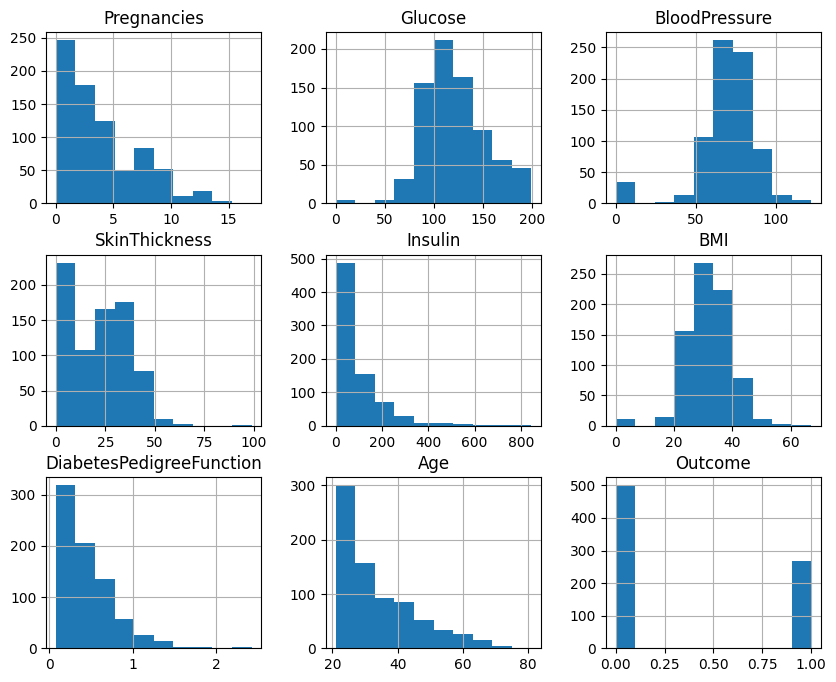

In [158]:
# Create histograms for each variable
df.hist(figsize=(10,8))
plt.show()

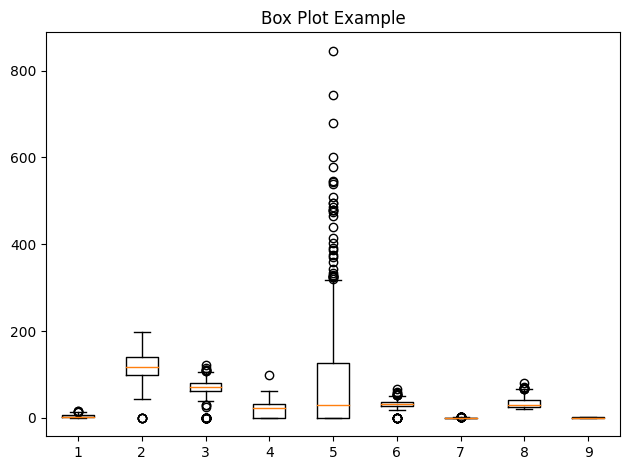

In [159]:
# Create box plots for each variable
plt.boxplot(df)

# Set plot title and labels
plt.title('Box Plot Example')

# Display the maximized plot
plt.tight_layout()  # Ensures that all elements fit within the plot area
plt.show()

<Axes: >

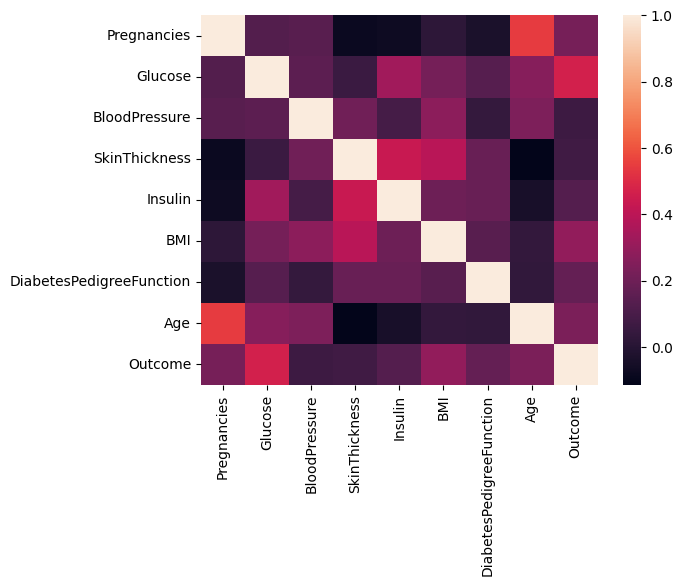

In [160]:
# Create a correlation matrix
sns.heatmap(df.corr())

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [161]:
# check the missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [162]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


There are 2 points that call attention to the first look:
1. "Insulin" has a high standard deviation, the quartile values are large, and the outlier is clear.
2. "SkinThickness" quartile distribution is uneven.

For better observation, plot these.

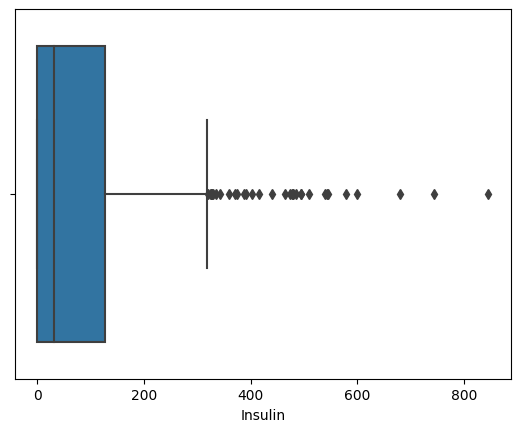

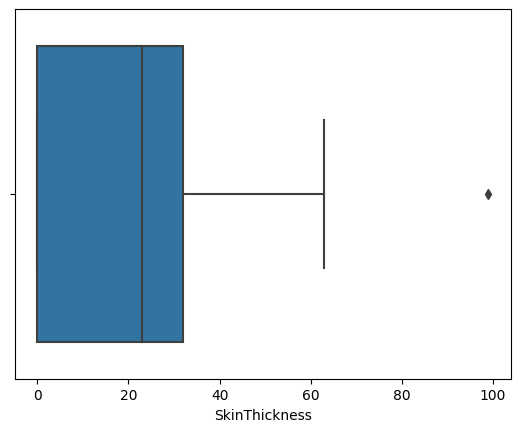

In [163]:
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()

In [164]:
# Identify outliers using the IQR method
Q1 = df['SkinThickness'].quantile(0.25)
Q3 = df['SkinThickness'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['SkinThickness'] < Q1 - 1.5 * IQR) | (df['SkinThickness'] > Q3 + 1.5 * IQR))]

Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Insulin'] < Q1 - 1.5 * IQR) | (df['Insulin'] > Q3 + 1.5 * IQR))]

In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,733.0,3.844475,3.384768,0.000,1.000,3.000,6.000,17.00
Glucose,733.0,119.076398,31.155123,0.000,99.000,115.000,137.000,199.00
BloodPressure,733.0,68.989086,19.626844,0.000,62.000,72.000,80.000,122.00
SkinThickness,733.0,19.877217,15.692875,0.000,0.000,22.000,32.000,63.00
Insulin,733.0,62.413370,79.153028,0.000,0.000,0.000,115.000,318.00
BMI,733.0,31.850205,7.924103,0.000,27.100,32.000,36.400,67.10
DiabetesPedigreeFunction,733.0,0.466771,0.322261,0.078,0.243,0.368,0.614,2.42
Age,733.0,33.145975,11.674278,21.000,24.000,29.000,40.000,81.00
Outcome,733.0,0.338336,0.473466,0.000,0.000,0.000,1.000,1.00


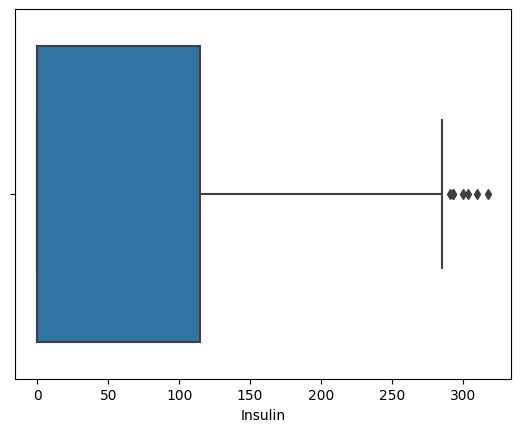

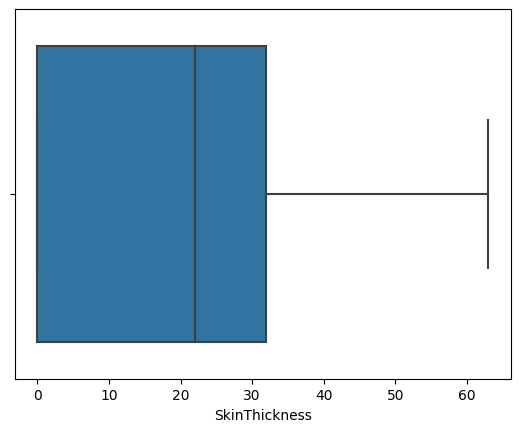

In [166]:
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['SkinThickness'])
plt.show()

- We used the IQR method to identify outliers.
- We removed outliers that were more than 1.5 IQRs away from the nearest quartile.

In [167]:
# Transform the categorical variable "Outcome" into dummy variables
df_dummies = pd.get_dummies(df, columns=['Outcome'], drop_first=True)
df_dummies.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_1
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [170]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [172]:
# Create a DecisionTreeClassifier instance
dtc = DecisionTreeClassifier()

In [173]:
parameters = {
    'criterion': ['gini','entropy'],
    'max_depth':[3,5,7,9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [174]:
# Perform GridSearchCV with 5-fold cross-validation
gridsearch = GridSearchCV(dtc,parameters,cv=5)

In [175]:
# Fit the model to the training data
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [176]:
# Get the best parameters
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [177]:
# Train the decision tree model with the best hyperparameters on the training set
best_dtc = DecisionTreeClassifier(**gridsearch.best_params_)
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)

In [178]:
# Make predictions on the test set
y_pred = gridsearch.predict(X_test)

In [179]:
# Calculate the accuracy
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7545454545454545


### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [180]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix,roc_curve,auc

In [181]:
# Make predictions on the test set
y_pred = gridsearch.predict(X_test)

In [182]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7545454545454545
Precision: 0.6557377049180327
Recall: 0.547945205479452
F1 Score: 0.5970149253731344


In [183]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[126  21]
 [ 33  40]]


In [184]:
# ROC Curve
y_prob = best_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

In [185]:
roc_auc

0.7304072313857051

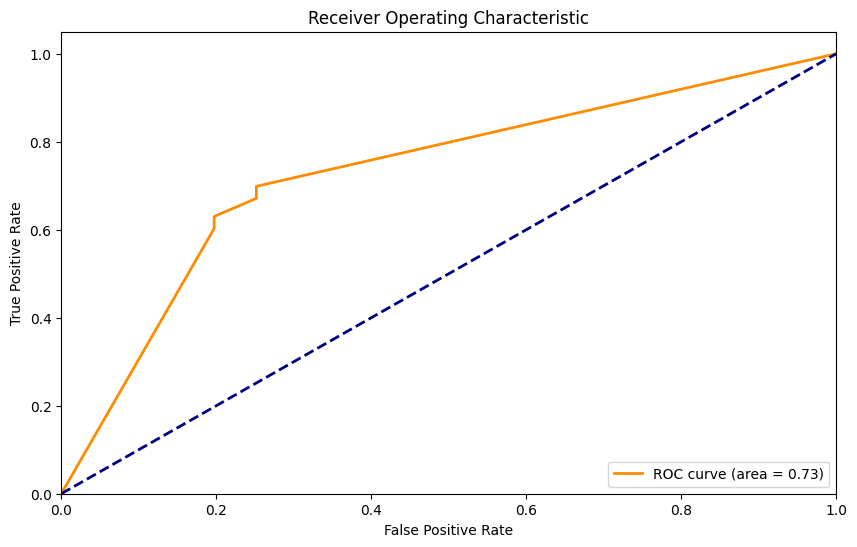

In [186]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [190]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
632,2,111,60,0,0,26.2,0.343,23
142,2,108,52,26,63,32.5,0.318,22
461,1,71,62,0,0,21.8,0.416,26
728,2,175,88,0,0,22.9,0.326,22
678,3,121,52,0,0,36.0,0.127,25


In [195]:
feature_names=X_train.columns
feature_names_custom = [name.replace(' ', '_') for name in feature_names]

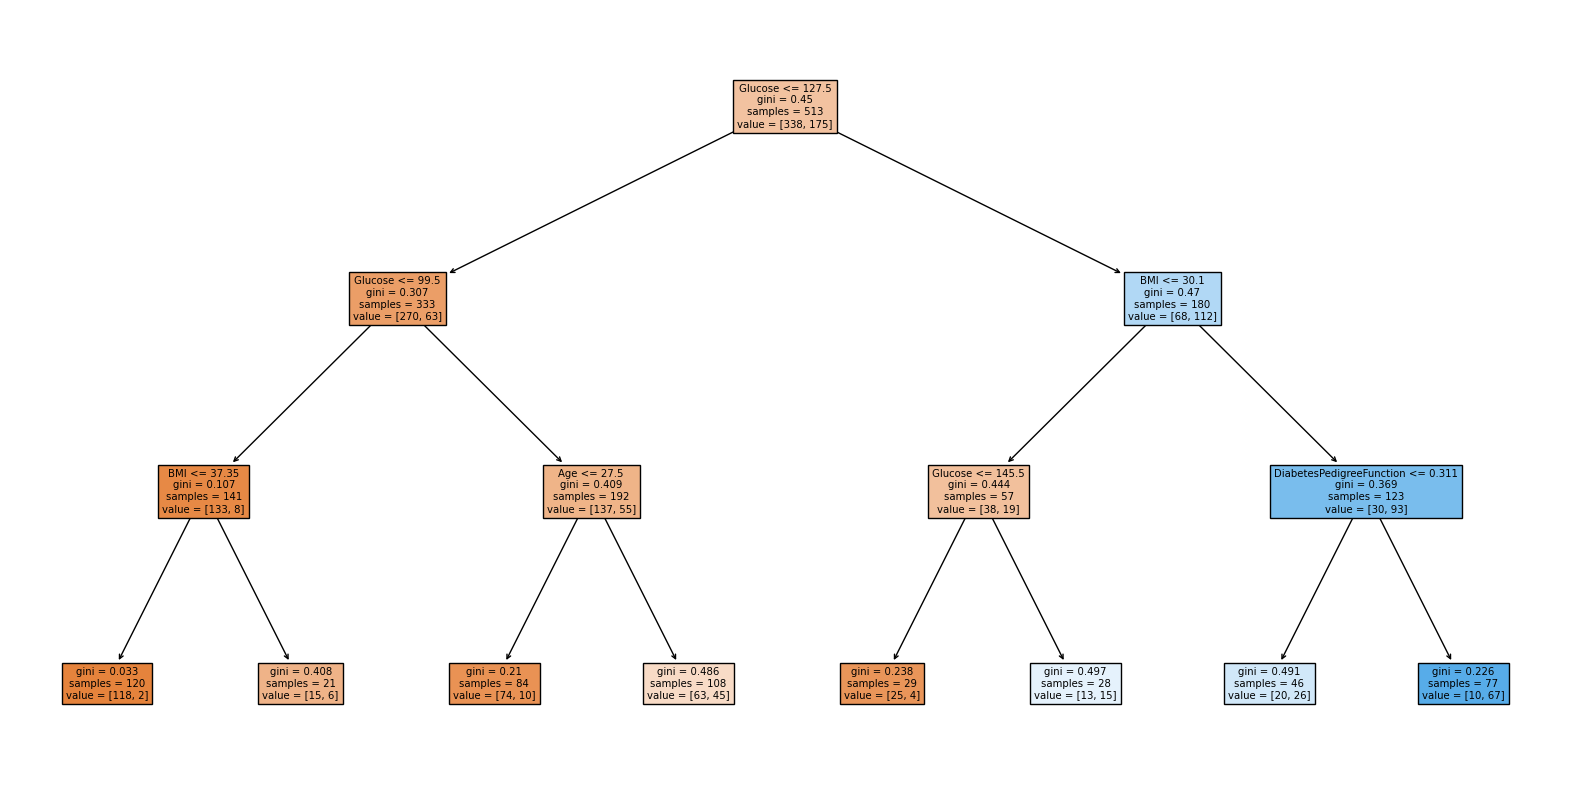

In [196]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(best_dtc, feature_names=feature_names_custom, filled=True)
plt.show()

**Interpretation:**
- The decision tree has the glucose level as the root node. This means that the decision tree first splits the data based on the glucose level. If the glucose level is less than or equal to 127.5, then the patient is more likely to have diabetes. Otherwise, the patient is less likely to have diabetes.

- The next split is based on the plasma glucose level. If the plasma glucose level is greater than or equal to 99.5, then the patient is more likely to have diabetes. Otherwise, the patient is less likely to have diabetes.

- The last split is based on the BMI. 

The most important variables in the decision tree are the glucose level, the plasma glucose level, and the BMI. These variables are the ones that are used to make the most splits in the tree. The thresholds for these variables are 127.5, 99.5, and 37.35, respectively.

Based on the columns in X_train, we can see that the decision tree is more likely to predict diabetes for patients with:

* Lower glucose levels
* Higher plasma glucose levels
* BMI

These patterns and trends are consistent with what we know about the risk factors for diabetes. Lower glucose levels are associated with a lower risk of diabetes, while higher glucose levels are associated with a higher risk of diabetes. Higher plasma glucose levels are also associated with a higher risk of diabetes.

The decision tree is a good way to visualize the relationships between the different variables and the likelihood of having diabetes. It can be used to identify the most important variables and the thresholds that are most likely to distinguish between patients with and without diabetes.

However, it is important to note that the decision tree is a simplification of the data. It does not take into account all of the factors that can contribute to diabetes. It is also important to remember that the decision tree is only a model, and it is not always accurate. It is always best to consult with a healthcare professional to get a diagnosis.

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

To validate the decision tree model, we can apply it to new data or test its robustness to changes in the dataset or the environment. We can also use sensitivity analysis and scenario testing to explore the uncertainty and risks.

Here are some specific steps we can take:

1. **Apply the decision tree model to new data.** This is a good way to see how well the model generalizes to new data. If the model is accurate on new data, then we can be more confident that it is a valid model.
2. **Test the robustness of the decision tree model to changes in the dataset.** This can be done by randomly removing some of the data from the dataset and then re-training the model. If the model is still accurate after the data is removed, then we can be more confident that it is a robust model.
3. **Use sensitivity analysis to explore the uncertainty and risks in the decision tree model.** Sensitivity analysis is a technique that can be used to determine how sensitive the output of a model is to changes in the input data. This can help us to identify the variables that are most important for the decision tree model and to understand the risks associated with the model.
4. **Use scenario testing to explore the uncertainty and risks in the decision tree model.** Scenario testing is a technique that can be used to simulate different scenarios and to see how the decision tree model would perform under each scenario. This can help us to understand the risks associated with the model and to make better decisions about how to use it.

By taking these steps, we can validate the decision tree model and gain a better understanding of its accuracy, robustness, and uncertainty. This can help us to use the model more effectively and to make better decisions about how to apply it.